In [1]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('ticks')
sns.set_palette('bright')
sns.set_context('notebook', font_scale=1.2)

 # Import Data

In [2]:
animation = pd.read_csv('Data/Animation.csv')
horror = pd.read_csv('Data/Horror.csv')
scifi = pd.read_csv('Data/SciFi.csv')
thriller = pd.read_csv('Data/Thriller.csv')


# Data Exploration and Analysis

In [3]:
animation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            8123 non-null   object 
 1   year             8117 non-null   float64
 2   director         7909 non-null   object 
 3   running_time     8123 non-null   int64  
 4   views            8123 non-null   int64  
 5   likes            8123 non-null   int64  
 6   avg_rating       8123 non-null   float64
 7   half_star        8123 non-null   int64  
 8   one_star         8123 non-null   int64  
 9   one_half_star    8123 non-null   int64  
 10  two_star         8123 non-null   int64  
 11  two_half_star    8123 non-null   int64  
 12  three_star       8123 non-null   int64  
 13  three_half_star  8123 non-null   int64  
 14  four_star        8123 non-null   int64  
 15  four_half_star   8123 non-null   int64  
 16  five_star        8123 non-null   int64  
dtypes: float64(2),

In [4]:
animation.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,8123,8117.000000,7909,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000,8123.000000
unique,7996,NaN,3630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Wind in the Willows,NaN,Chuck Jones,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,NaN,211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1987.235555,NaN,40.215807,5574.548320,1029.206205,3.219993,26.816078,53.858180,49.394189,159.230703,178.719685,494.971808,418.605441,614.074726,218.986458,358.851286
std,NaN,29.929833,NaN,52.810033,32810.409398,7866.939311,0.383906,225.141093,329.424902,271.258463,830.414109,872.042594,2608.639808,2390.891234,4489.385820,1976.451042,3718.157477
min,NaN,1885.000000,NaN,1.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1961.000000,NaN,7.000000,110.500000,13.000000,3.000000,0.000000,1.000000,1.000000,4.000000,6.000000,13.000000,8.000000,6.000000,1.000000,2.000000
50%,NaN,2000.000000,NaN,13.000000,231.000000,31.000000,3.300000,1.000000,3.000000,3.000000,9.000000,12.000000,28.000000,19.000000,17.000000,4.000000,6.000000
75%,NaN,2013.000000,NaN,75.500000,740.000000,108.000000,3.400000,5.000000,9.000000,9.000000,25.000000,34.000000,83.000000,64.000000,60.000000,16.000000,24.000000


In [5]:
horror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11052 entries, 0 to 11051
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            11052 non-null  object 
 1   year             11046 non-null  float64
 2   director         10976 non-null  object 
 3   running_time     11052 non-null  int64  
 4   views            11052 non-null  int64  
 5   likes            11052 non-null  int64  
 6   avg_rating       11052 non-null  float64
 7   half_star        11052 non-null  int64  
 8   one_star         11052 non-null  int64  
 9   one_half_star    11052 non-null  int64  
 10  two_star         11052 non-null  int64  
 11  two_half_star    11052 non-null  int64  
 12  three_star       11052 non-null  int64  
 13  three_half_star  11052 non-null  int64  
 14  four_star        11052 non-null  int64  
 15  four_half_star   11052 non-null  int64  
 16  five_star        11052 non-null  int64  
dtypes: float64(2

In [6]:
horror.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,11052,11046.000000,10976,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000,11052.000000
unique,10339,NaN,6826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Frankenstein,NaN,David DeCoteau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1997.829712,NaN,83.197883,4344.529406,823.853782,2.810062,52.435215,99.525606,93.569399,234.609482,241.492038,511.017101,422.037821,507.563156,169.017644,214.110297
std,NaN,20.641835,NaN,28.903248,22098.558663,6153.743060,0.461166,237.354295,394.178772,345.956247,888.161944,899.024736,2229.331836,2211.361403,3773.986745,1676.276906,2646.450847
min,NaN,1895.000000,NaN,1.000000,34.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1986.000000,NaN,80.000000,104.000000,10.000000,2.500000,2.000000,5.000000,5.000000,9.000000,8.000000,11.000000,5.000000,3.000000,0.000000,1.000000
50%,NaN,2006.000000,NaN,89.000000,277.000000,31.000000,2.800000,7.000000,13.000000,13.000000,25.000000,24.000000,33.000000,17.000000,11.000000,2.000000,3.000000
75%,NaN,2014.000000,NaN,95.000000,1110.250000,148.000000,3.100000,22.000000,40.000000,41.000000,93.000000,96.000000,157.000000,90.000000,61.000000,12.000000,14.000000


In [7]:
scifi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5827 entries, 0 to 5826
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            5827 non-null   object 
 1   year             5823 non-null   float64
 2   director         5779 non-null   object 
 3   running_time     5827 non-null   int64  
 4   views            5827 non-null   int64  
 5   likes            5827 non-null   int64  
 6   avg_rating       5827 non-null   float64
 7   half_star        5827 non-null   int64  
 8   one_star         5827 non-null   int64  
 9   one_half_star    5827 non-null   int64  
 10  two_star         5827 non-null   int64  
 11  two_half_star    5827 non-null   int64  
 12  three_star       5827 non-null   int64  
 13  three_half_star  5827 non-null   int64  
 14  four_star        5827 non-null   int64  
 15  four_half_star   5827 non-null   int64  
 16  five_star        5827 non-null   int64  
dtypes: float64(2),

In [8]:
scifi.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,5827,5823.000000,5779,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000,5827.000000
unique,5640,NaN,3947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Frankenstein,NaN,Ishirō Honda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1996.500429,NaN,85.318002,12432.362966,2469.437275,2.898387,109.180196,229.080316,206.881414,579.137635,575.518277,1329.661919,1058.524455,1426.026944,499.093015,740.281105
std,NaN,20.592035,NaN,37.434474,53452.425040,14479.067824,0.511744,617.083835,1102.621337,881.745149,2359.063044,2210.382857,5530.382149,4705.722622,8070.482505,3499.584214,6229.123148
min,NaN,1895.000000,NaN,1.000000,35.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1985.000000,NaN,78.000000,119.000000,13.000000,2.600000,1.000000,4.000000,4.000000,9.000000,8.000000,13.000000,6.000000,4.000000,1.000000,1.000000
50%,NaN,2003.000000,NaN,90.000000,333.000000,42.000000,2.900000,6.000000,12.000000,12.000000,26.000000,24.000000,38.000000,21.000000,16.000000,3.000000,5.000000
75%,NaN,2013.000000,NaN,100.000000,1831.000000,239.500000,3.300000,25.000000,52.000000,55.000000,123.500000,137.000000,237.000000,141.000000,110.000000,23.000000,31.000000


In [9]:
thriller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12836 entries, 0 to 12835
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            12836 non-null  object 
 1   year             12833 non-null  float64
 2   director         12802 non-null  object 
 3   running_time     12836 non-null  int64  
 4   views            12836 non-null  int64  
 5   likes            12836 non-null  int64  
 6   avg_rating       12836 non-null  float64
 7   half_star        12836 non-null  int64  
 8   one_star         12836 non-null  int64  
 9   one_half_star    12836 non-null  int64  
 10  two_star         12836 non-null  int64  
 11  two_half_star    12836 non-null  int64  
 12  three_star       12836 non-null  int64  
 13  three_half_star  12836 non-null  int64  
 14  four_star        12836 non-null  int64  
 15  four_half_star   12836 non-null  int64  
 16  five_star        12836 non-null  int64  
dtypes: float64(2

In [10]:
thriller.describe(include='all')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
count,12836,12833.000000,12802,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000,12836.000000
unique,11990,NaN,7668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Trapped,NaN,Alfred Hitchcock,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,6,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1998.998831,NaN,98.254986,7473.757089,1422.891088,2.938969,54.903007,118.423496,117.293316,328.195700,355.639140,812.383998,723.173185,948.507012,357.502805,428.523605
std,NaN,20.167857,NaN,25.973443,32415.529590,9362.125019,0.447462,281.126271,494.097765,432.564697,1148.446012,1172.661312,2939.661636,2946.029343,5475.450129,2816.761870,4722.109520
min,NaN,1902.000000,NaN,1.000000,33.000000,0.000000,0.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1989.000000,NaN,88.000000,110.000000,10.000000,2.700000,1.000000,3.000000,4.000000,10.000000,10.000000,14.000000,7.000000,4.000000,0.000000,1.000000
50%,NaN,2007.000000,NaN,95.000000,339.000000,35.500000,3.000000,5.000000,10.000000,11.000000,27.000000,29.000000,48.000000,28.000000,18.000000,3.000000,4.000000
75%,NaN,2014.000000,NaN,107.000000,1826.000000,222.000000,3.200000,18.000000,39.000000,44.000000,117.000000,139.000000,264.000000,183.000000,129.000000,24.000000,25.000000


In [11]:
animation.fillna(0, inplace=True)
horror.fillna(0, inplace=True)
scifi.fillna(0, inplace=True)
thriller.fillna(0, inplace=True)

animation['year'] = animation['year'].astype(int)
horror['year'] = horror['year'].astype(int)
scifi['year'] = scifi['year'].astype(int)
thriller['year'] = thriller['year'].astype(int)

In [12]:
animation_rating_mean = round(animation['avg_rating'].mean(), 2)
animation_rating_std = round(animation['avg_rating'].std(), 2)

horror_rating_mean = round(horror['avg_rating'].mean(), 2)
horror_rating_std = round(horror['avg_rating'].std(), 2)

scifi_rating_mean = round(scifi['avg_rating'].mean(), 2)
scifi_rating_std = round(scifi['avg_rating'].std(), 2)

thriller_rating_mean = round(thriller['avg_rating'].mean(), 2)
thriller_rating_std = round(thriller['avg_rating'].std(), 2)

In [13]:
animation_n_movies = len(animation)
horror_n_movies = len(horror)
scifi_n_movies = len(scifi)
thriller_n_movies = len(thriller)

## Average Rating Distribution


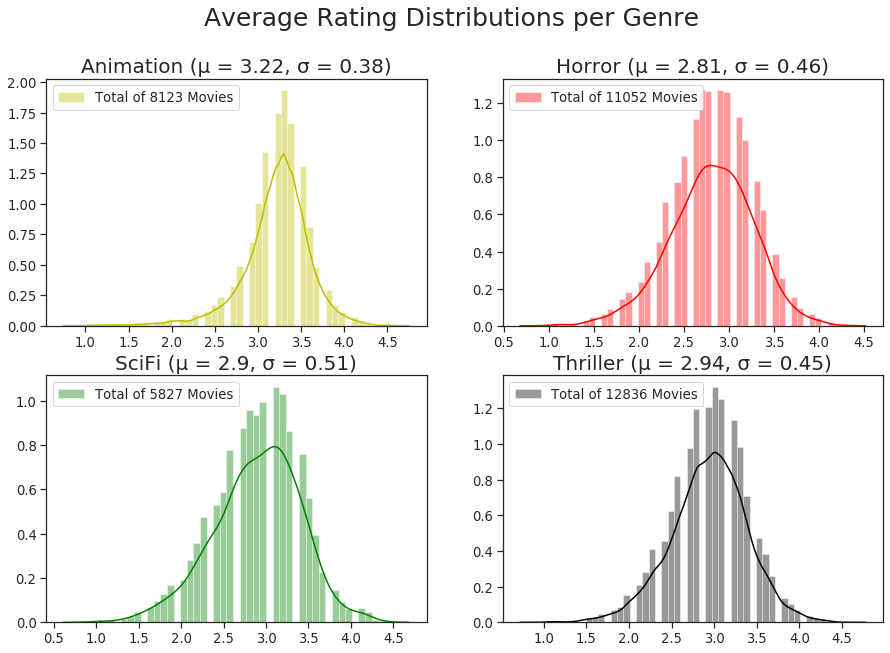

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Average Rating Distributions per Genre', fontsize=25)

sns.distplot(animation.avg_rating, ax=axes[0,0], norm_hist=True,
             color='y', axlabel=False, label=f'Total of {animation_n_movies} Movies')
axes[0,0].set_title(f'Animation (μ = {animation_rating_mean}, σ = {animation_rating_std})', fontsize=20)
axes[0,0].legend(loc='upper left')

sns.distplot(horror.avg_rating, ax=axes[0,1], norm_hist=True,
             color='r', axlabel=False, label=f'Total of {horror_n_movies} Movies')
axes[0,1].set_title(f'Horror (μ = {horror_rating_mean}, σ = {horror_rating_std})', fontsize=20)
axes[0,1].legend(loc='upper left')

sns.distplot(scifi.avg_rating, ax=axes[1,0], norm_hist=True,
             color='g', axlabel=False, label=f'Total of {scifi_n_movies} Movies')
axes[1,0].set_title(f'SciFi (μ = {scifi_rating_mean}, σ = {scifi_rating_std})', fontsize=20)
axes[1,0].legend(loc='upper left')

sns.distplot(thriller.avg_rating, ax=axes[1,1], norm_hist=True,
             color='k', axlabel=False, label=f'Total of {thriller_n_movies} Movies')
axes[1,1].set_title(f'Thriller (μ = {thriller_rating_mean}, σ = {thriller_rating_std})', fontsize=20)
axes[1,1].legend(loc='upper left')

plt.savefig('Figures/Avg_Rating_Distplot.jpg')
plt.show()

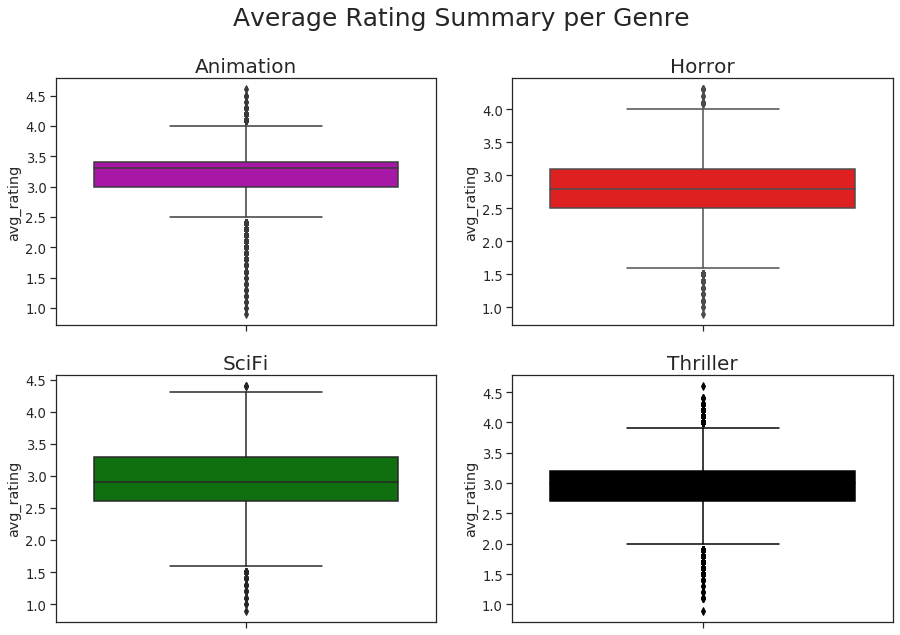

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Average Rating Summary per Genre', fontsize=25)

sns.boxplot(animation.avg_rating, ax=axes[0,0], color='m', orient='v')
axes[0,0].set_title('Animation', fontsize=20)

sns.boxplot(horror.avg_rating, ax=axes[0,1], color='r', orient='v')
axes[0,1].set_title('Horror', fontsize=20)

sns.boxplot(scifi.avg_rating, ax=axes[1,0], color='g', orient='v')
axes[1,0].set_title('SciFi', fontsize=20)

sns.boxplot(thriller.avg_rating, ax=axes[1,1], color='k', orient='v')
axes[1,1].set_title('Thriller', fontsize=20)

plt.show()

## Average Rating by Year

In [16]:
animation_by_year = animation.groupby('year').mean()[['avg_rating', 'likes', 'views']].drop([0], axis=0)
horror_by_year = horror.groupby('year').mean()[['avg_rating', 'likes', 'views']].drop([0], axis=0)
scifi_by_year = scifi.groupby('year').mean()[['avg_rating', 'likes', 'views']].drop([0], axis=0)
thriller_by_year = thriller.groupby('year').mean()[['avg_rating', 'likes', 'views']].drop([0, 2021], axis=0)

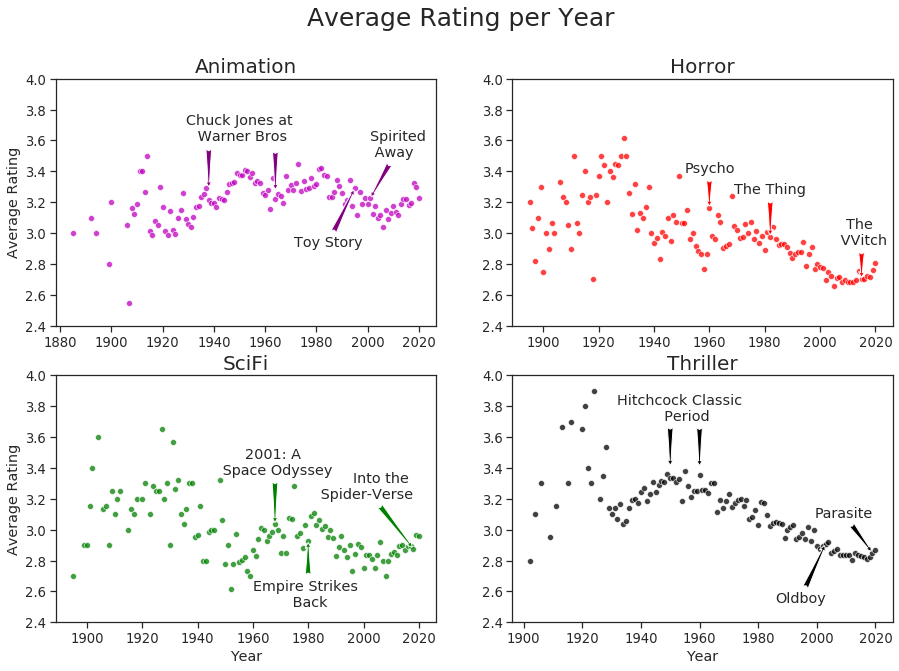

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10), squeeze=True)
fig.suptitle('Average Rating per Year', fontsize=25)

##Plots:

sns.scatterplot(data = animation_by_year.avg_rating, ax=axes[0,0], color='m',
               alpha=0.75)
axes[0,0].set_title('Animation', fontsize=20)
axes[0,0].set_ylabel('Average Rating')
axes[0,0].set_ylim((2.4,4))

sns.scatterplot(data = horror_by_year.avg_rating, ax=axes[0,1], color='r',
               alpha=0.75)
axes[0,1].set_title('Horror', fontsize=20)
axes[0,1].set_ylim((2.4,4))

sns.scatterplot(data = scifi_by_year.avg_rating, ax=axes[1,0], color='g',
               alpha=0.75)
axes[1,0].set_title('SciFi', fontsize=20)
axes[1,0].set_ylabel('Average Rating')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylim((2.4,4))

sns.scatterplot(data = thriller_by_year.avg_rating, ax=axes[1,1], color='k',
               alpha=0.75)
axes[1,1].set_title('Thriller', fontsize=20)
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylim((2.4,4))

# -----Annotations-----:

# ------------Animation------------
axes[0,0].annotate('Spirited \n Away', 
                   xy=(2001, animation_by_year.loc[2001]['avg_rating']),
                   xytext=(2001, animation_by_year.loc[2001]['avg_rating'] + 0.25),
                   arrowprops=dict(arrowstyle='fancy', facecolor='purple'),
                   horizontalalignment='left',
                   verticalalignment='bottom')

axes[0,0].annotate('Toy Story', 
                   xy=(1995, animation_by_year.loc[1995]['avg_rating']),
                   xytext=(1998, animation_by_year.loc[1995]['avg_rating'] - 0.4),
                   arrowprops=dict(arrowstyle='fancy', facecolor='purple'),
                   horizontalalignment='right',
                   verticalalignment='bottom')

axes[0,0].annotate('Chuck Jones at \n Warner Bros ', 
                   xy=(1951, animation_by_year.loc[1951]['avg_rating'] ),
                   xytext=(1951, animation_by_year.loc[1951]['avg_rating'] + 0.4),
                   arrowprops=dict(arrowstyle='-', facecolor='purple'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[0,0].annotate('', 
                   xy=(1938, animation_by_year.loc[1938]['avg_rating'] + 0.07),
                   xytext=(1938, animation_by_year.loc[1938]['avg_rating'] + 0.34),
                   arrowprops=dict(arrowstyle='fancy', facecolor='purple'),
                   horizontalalignment='left',
                   verticalalignment='top')

axes[0,0].annotate('', 
                   xy=(1964, animation_by_year.loc[1964]['avg_rating'] + 0.05),
                   xytext=(1964, animation_by_year.loc[1964]['avg_rating'] + 0.32),
                   arrowprops=dict(arrowstyle='fancy', facecolor='purple'),
                   horizontalalignment='right',
                   verticalalignment='top')




# ---------- Horror ----------
axes[0,1].annotate('The Thing', 
                   xy=(1982, horror_by_year.loc[1982]['avg_rating']),
                   xytext=(1982, horror_by_year.loc[1982]['avg_rating'] + 0.35),
                   arrowprops=dict(arrowstyle='fancy', facecolor='red'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[0,1].annotate('Psycho', 
                   xy=(1960, horror_by_year.loc[1960]['avg_rating']),
                   xytext=(1960, horror_by_year.loc[1960]['avg_rating'] + 0.3),
                   arrowprops=dict(arrowstyle='fancy', facecolor='red'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[0,1].annotate('The \n VVitch', 
                   xy=(2015, horror_by_year.loc[2015]['avg_rating']),
                   xytext=(2015, horror_by_year.loc[2015]['avg_rating'] + 0.4),
                   arrowprops=dict(arrowstyle='fancy', facecolor='red'),
                   horizontalalignment='center',
                   verticalalignment='top')

# ---------- SciFi ----------

axes[1,0].annotate('Empire Strikes \n Back', 
                   xy=(1980, scifi_by_year.loc[1980]['avg_rating']),
                   xytext=(1980, scifi_by_year.loc[1980]['avg_rating'] - 0.25),
                   arrowprops=dict(arrowstyle='fancy', facecolor='green'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[1,0].annotate('2001: A \n Space Odyssey', 
                   xy=(1968, scifi_by_year.loc[1968]['avg_rating']),
                   xytext=(1968, scifi_by_year.loc[1968]['avg_rating'] + 0.5),
                   arrowprops=dict(arrowstyle='fancy', facecolor='green'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[1,0].annotate('Into the \n Spider-Verse', 
                   xy=(2018, scifi_by_year.loc[2018]['avg_rating']),
                   xytext=(2018, scifi_by_year.loc[2018]['avg_rating'] + 0.5),
                   arrowprops=dict(arrowstyle='fancy', facecolor='green'),
                   horizontalalignment='right',
                   verticalalignment='top')

# ---------Thriller-------------
axes[1,1].annotate('Parasite', 
                   xy=(2019, thriller_by_year.loc[2019]['avg_rating']),
                   xytext=(2019, thriller_by_year.loc[2019]['avg_rating'] + 0.3),
                   arrowprops=dict(arrowstyle='fancy', facecolor='black'),
                   horizontalalignment='right',
                   verticalalignment='top')

axes[1,1].annotate('Hitchcock Classic \n  Period', 
                   xy=(1955, thriller_by_year.loc[1955]['avg_rating'] ),
                   xytext=(1954, thriller_by_year.loc[1955]['avg_rating'] + 0.5),
                   arrowprops=dict(arrowstyle='-', facecolor='black'),
                   horizontalalignment='center',
                   verticalalignment='top')

axes[1,1].annotate('', 
                   xy=(1950, thriller_by_year.loc[1950]['avg_rating'] + 0.07),
                   xytext=(1950, thriller_by_year.loc[1950]['avg_rating'] + 0.34),
                   arrowprops=dict(arrowstyle='fancy', facecolor='black'),
                   horizontalalignment='left',
                   verticalalignment='top')

axes[1,1].annotate('', 
                   xy=(1960, thriller_by_year.loc[1960]['avg_rating'] + 0.05),
                   xytext=(1960, thriller_by_year.loc[1960]['avg_rating'] + 0.32),
                   arrowprops=dict(arrowstyle='fancy', facecolor='black'),
                   horizontalalignment='right',
                   verticalalignment='top')

axes[1,1].annotate('Oldboy', 
                   xy=(2003, thriller_by_year.loc[2003]['avg_rating'] ),
                   xytext=(2003, thriller_by_year.loc[2003]['avg_rating'] - 0.4),
                   arrowprops=dict(arrowstyle='fancy', facecolor='black'),
                   horizontalalignment='right',
                   verticalalignment='bottom')



plt.savefig('Figures/Avg_Rating_per_Year.jpg')
plt.show()

### Animation

Aniamation has a near constant trend in rating over time. Pretty consistent!

Mention Into the spiderverse! Didnt annotate to avoid clutter

In [37]:
top_animation = animation[(animation.running_time >= 60) & (animation.running_time <= 180)].nlargest(17, 'avg_rating')
top_animation.drop([25,90], axis=0, inplace=True)
top_animation

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
8119,Spirited Away,2001,Hayao Miyazaki,125,437759,178080,4.5,257,512,291,1687,1760,10355,14469,56612,43915,121555
0,Spider-Man: Into the Spider-Verse,2018,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471600,232066,4.4,275,585,329,1929,2184,13931,22173,84347,71034,151015
5,Princess Mononoke,1997,Hayao Miyazaki,134,214237,76679,4.3,84,187,145,900,1216,6549,10927,32934,25078,43308
8028,Neon Genesis Evangelion: The End of Evangelion,1997,"Hideaki Anno,Kazuya Tsurumaki",87,54217,19992,4.3,127,157,156,412,546,1843,2449,6910,5789,13323
8039,It's Such a Beautiful Day,2012,Don Hertzfeldt,62,35875,13329,4.3,56,114,78,306,339,1343,1940,5275,4326,8397
8091,Perfect Blue,1997,Satoshi Kon,81,91101,35405,4.3,47,114,92,434,681,3012,5844,17688,13882,17324
8095,Grave of the Fireflies,1988,Isao Takahata,89,126525,40588,4.3,112,183,168,704,966,3760,6235,18915,15316,27127
11,Your Name.,2016,Makoto Shinkai,106,175635,68673,4.2,257,387,425,1701,2305,8738,13399,31838,22584,37559
18,Howl's Moving Castle,2004,Hayao Miyazaki,119,207310,70875,4.2,69,200,232,1125,1828,8763,15046,34983,18480,32457
7292,Rilakkuma and Kaoru,2019,Masahito Kobayashi,151,1245,519,4.2,0,2,3,5,9,41,84,233,110,241


In [22]:
chuck_jones_films = animation[animation['director'] == 'Chuck Jones'].sort_values('avg_rating', ascending=False)

In [23]:
chuck_jones_films.sort_values('running_time', ascending=False)

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
3621,Raggedy Ann and Raggedy Andy in the Pumpkin Wh...,1979,Chuck Jones,30,106,24,3.3,1,1,0,6,6,19,10,4,2,5
3577,A Very Merry Cricket,1973,Chuck Jones,30,90,12,3.3,1,1,0,2,5,15,6,10,1,3
2206,A Cricket in Times Square,1973,Chuck Jones,26,76,9,3.4,1,1,0,2,2,9,8,8,2,1
3592,Adventures of the Road-Runner,1962,Chuck Jones,26,222,23,3.4,0,2,1,2,4,24,17,13,1,7
3618,A Connecticut Rabbit in King Arthur's Court,1978,Chuck Jones,25,201,26,3.2,0,3,0,7,11,27,13,9,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4737,Coming!! Snafu,1943,Chuck Jones,3,216,18,2.8,2,10,7,18,16,31,11,8,0,0
1419,A Lecture on Camouflage,1944,Chuck Jones,3,126,7,2.9,0,6,5,14,10,13,8,3,0,0
3195,The Good Egg,1945,Chuck Jones,3,106,4,2.7,6,9,6,10,2,14,2,3,0,0
1389,Gas,1944,Chuck Jones,3,120,9,2.9,1,4,6,15,8,11,5,4,1,2


In [59]:
animation[(animation.year > 1880) & (animation.year < 1930)].shape[0]/5

43.4

In [61]:
animation[(animation.year > 1880) & (animation.year < 1930)].running_time.mean()

6.912442396313364

In [62]:
animation[(animation.year > 1880) & (animation.year < 1930)]

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
144,Gertie the Dinosaur,1914,Winsor McCay,12,4732,701,3.5,4,19,10,87,135,525,450,429,99,193
166,Fantasmagoria,1908,Émile Cohl,2,3678,564,3.4,3,22,13,77,102,372,380,331,68,102
220,Poor Pierrot,1892,Émile Reynaud,4,2675,290,3.0,7,33,27,126,154,314,153,123,27,56
264,"Winsor McCay, the Famous Cartoonist of the N.Y...",1911,"Winsor McCay,J. Stuart Blackton",12,1408,204,3.4,5,7,11,35,58,172,164,147,38,52
351,The Enchanted Drawing,1900,J. Stuart Blackton,2,1249,150,3.2,2,7,11,37,57,174,97,80,18,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7265,Plane Crazy,1929,"Walt Disney,Ub Iwerks",6,2504,357,3.4,5,8,14,55,78,303,215,205,52,69
7568,The Cameraman's Revenge,1912,Wladyslaw Starewicz,13,3086,765,3.8,3,10,6,34,62,209,363,525,213,210
7755,The Skeleton Dance,1929,Walt Disney,6,12156,2405,3.9,5,19,20,84,158,726,758,1451,371,964
7863,Steamboat Willie,1928,"Walt Disney,Ub Iwerks",8,24620,3732,3.7,24,71,45,239,389,1898,1618,2652,542,1277


#### Miyazaki-San Analysis

In the top 15 feature length animation films, Miyazaki has 4 appearances.

His mean average rating over all his films is 3.8, while for the genre is 3.2, almost $2 \sigma$ above the mean.

In [39]:
miyazaki_films = animation[animation['director'] == 'Hayao Miyazaki'].sort_values('avg_rating', ascending=False)


In [34]:
miyazaki_films['avg_rating'].mean()

3.831818181818181

In [35]:
animation.avg_rating.mean()

3.2199926135663937

In [38]:
miyazaki_films['avg_rating'].std()

0.3550806261713684

### Horror

In [64]:
horror.nlargest(17, 'avg_rating')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
7,The Thing,1982,John Carpenter,109,215480,78005,4.3,112,324,247,1339,1539,8292,12174,35860,24541,48856
11039,Psycho,1960,Alfred Hitchcock,109,323090,101065,4.3,85,229,167,1161,1335,10300,13792,50703,33030,63548
11041,Alien,1979,Ridley Scott,117,379504,130782,4.3,146,442,299,1973,1963,13696,17644,60265,38066,81281
11046,The Silence of the Lambs,1991,Jonathan Demme,119,482939,161110,4.3,148,365,259,1727,1904,14691,20634,80047,51372,92363
11049,The Shining,1980,Stanley Kubrick,144,535777,196151,4.3,463,1016,610,3798,3328,20073,22634,82486,52363,123437
4,Rosemary's Baby,1968,Roman Polanski,137,158689,46272,4.2,156,372,253,1326,1412,6933,9562,27455,18616,24435
8827,In Just the Wink of an Eye,1981,Mike de Leon,98,276,105,4.2,0,0,0,1,0,9,12,39,43,58
0,Get Out,2017,Jordan Peele,104,605132,261668,4.1,647,1560,1001,5727,5821,34069,45053,136842,65726,110264
14,What We Do in the Shadows,2014,"Taika Waititi,Jemaine Clement",86,210944,80476,4.1,177,378,294,1549,2260,11534,21547,49711,23046,28627
207,Demons,1971,Toshio Matsumoto,134,1860,593,4.1,0,2,1,15,30,62,153,380,288,262


In [65]:
horror[horror['title'] == 'The Witch']

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
1184,The Witch,1952,Roland af Hällström,74,151,37,3.3,0,1,4,4,9,30,23,33,1,1
4598,The Witch,1954,Chano Urueta,90,52,7,3.4,0,0,1,2,2,9,13,3,0,2
7627,The Witch,1966,Damiano Damiani,109,195,32,3.4,0,1,2,9,16,29,32,26,7,7
11042,The Witch,2015,Robert Eggers,92,265695,83771,3.8,1042,2425,1446,6307,5999,20950,27476,57322,26689,30475


In [72]:
horror[horror['title'] == 'The Thing']

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
7,The Thing,1982,John Carpenter,109,215480,78005,4.3,112,324,247,1339,1539,8292,12174,35860,24541,48856
76,The Thing,2011,Matthijs van Heijningen Jr.,103,40852,3854,2.7,447,1080,1508,4158,4275,6187,3105,1644,239,354


In [73]:
horror.avg_rating.mean()

2.8100615273253724

In [74]:
horror.avg_rating.std()

0.46116599067841346

#### The Thing

Highest rated Horror film on platform. 

$3.2 \sigma$ above genre mean!

### Sci-Fi

In [77]:
scifi.nlargest(16, 'avg_rating')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Spider-Man: Into the Spider-Verse,2018,"Rodney Rothman,Peter Ramsey,Bob Persichetti",117,471056,231832,4.4,275,585,330,1923,2178,13916,22153,84260,70990,150869
9,The Empire Strikes Back,1980,Irvin Kershner,124,506762,180467,4.4,228,473,268,1861,2023,15036,16978,62922,44127,127552
5760,Stalker,1979,Andrey Tarkovsky,162,80202,28967,4.4,121,220,211,596,691,2314,3277,9860,9856,23385
1,Alien,1979,Ridley Scott,117,379337,130733,4.3,145,442,299,1974,1961,13690,17632,60239,38044,81236
12,2001: A Space Odyssey,1968,Stanley Kubrick,149,339349,117398,4.3,767,1662,863,3863,2860,12669,12115,38334,28574,94504
5652,Neon Genesis Evangelion: The End of Evangelion,1997,"Hideaki Anno,Kazuya Tsurumaki",87,54131,19965,4.3,127,157,156,412,543,1840,2445,6900,5774,13306
5787,The Thing,1982,John Carpenter,109,215385,77971,4.3,112,324,247,1337,1538,8285,12168,35842,24522,48840
5811,Star Wars,1977,George Lucas,121,548822,189813,4.3,317,723,411,2841,3223,22991,26838,87856,46209,101821
16,Terminator 2: Judgment Day,1991,James Cameron,156,268780,77191,4.2,137,353,254,1812,1946,11120,13982,40298,26341,42377
30,Solaris,1972,Andrey Tarkovsky,167,62498,18165,4.2,57,161,151,608,727,2349,3615,9830,8301,10518


#### Empire Strikes Back

$2.9 \sigma$ above genre avg

In [94]:
scifi[scifi['title'] == 'The Empire Strikes Back']

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
9,The Empire Strikes Back,1980,Irvin Kershner,124,506762,180467,4.4,228,473,268,1861,2023,15036,16978,62922,44127,127552


In [95]:
scifi.avg_rating.mean()

2.8983868199759772

In [96]:
scifi.avg_rating.std()

0.5117441276637965

### Thriller


In [24]:
thriller.nlargest(15, 'avg_rating')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
0,Parasite,2019,Bong Joon-ho,133,539266,283450,4.6,308,427,289,1266,1640,8667,14524,69003,90025,243931
12474,Woman in the Dunes,1964,Hiroshi Teshigahara,123,17151,5783,4.4,20,25,16,77,96,431,770,2656,2745,3724
12590,High and Low,1963,Akira Kurosawa,142,26773,9744,4.4,3,15,8,53,93,506,1084,4071,4835,6769
12833,Pulp Fiction,1994,Quentin Tarantino,154,693834,286934,4.4,642,1592,738,4727,3552,24158,24063,97896,65407,181714
12835,The Dark Knight,2008,Christopher Nolan,152,712015,286444,4.4,418,961,539,3362,3224,20605,22880,96118,71165,187892
1,Psycho,1960,Alfred Hitchcock,109,323092,101066,4.3,85,229,167,1161,1335,10300,13792,50704,33030,63548
8,No Country for Old Men,2007,"Joel Coen,Ethan Coen",122,368493,121964,4.3,281,773,429,2600,2365,13141,17989,62060,45263,72926
12215,Le Trou,1960,Jacques Becker,132,9685,3071,4.3,5,7,6,29,41,195,479,1805,1897,1717
12429,Army of Shadows,1969,Jean-Pierre Melville,145,16855,5099,4.3,7,21,12,94,151,597,1067,3038,2606,3247
12483,A Man Escaped,1956,Robert Bresson,101,21763,6531,4.3,11,16,23,100,157,671,1339,4072,3179,3765


In [25]:
hitchcock_films = thriller[thriller['director'] == 'Alfred Hitchcock'].sort_values('avg_rating', ascending=False)

In [26]:
thriller[(thriller.year >= 1950) & (thriller.year <= 1960)].nlargest(15, 'avg_rating')

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
1,Psycho,1960,Alfred Hitchcock,109,323092,101066,4.3,85,229,167,1161,1335,10300,13792,50704,33030,63548
12215,Le Trou,1960,Jacques Becker,132,9685,3071,4.3,5,7,6,29,41,195,479,1805,1897,1717
12483,A Man Escaped,1956,Robert Bresson,101,21763,6531,4.3,11,16,23,100,157,671,1339,4072,3179,3765
12793,Rear Window,1954,Alfred Hitchcock,112,209305,68430,4.3,37,149,106,674,978,5937,10078,33900,24874,42485
130,Sweet Smell of Success,1957,Alexander Mackendrick,97,21043,6359,4.2,9,11,27,115,192,857,1508,3851,3185,3437
12428,The Wages of Fear,1953,Henri-Georges Clouzot,153,18807,5430,4.2,14,26,29,92,164,614,1223,3365,3023,3087
12476,In a Lonely Place,1950,Nicholas Ray,94,23904,7211,4.2,10,22,25,114,217,1008,1967,4934,3393,3566
12697,The Night of the Hunter,1955,Charles Laughton,93,57206,18460,4.2,33,90,84,451,638,2377,3779,9171,7402,11402
12740,North by Northwest,1959,Alfred Hitchcock,136,109221,28877,4.2,37,92,109,529,791,4393,7713,19964,12284,14272
12804,Vertigo,1958,Alfred Hitchcock,128,207023,60166,4.2,138,322,303,1378,1780,8715,12325,32198,20712,38301


In [27]:
hitchcock_films[(hitchcock_films.year >= 1950) & (hitchcock_films.year <= 1960)]

,title,year,director,running_time,views,likes,avg_rating,half_star,one_star,one_half_star,two_star,two_half_star,three_star,three_half_star,four_star,four_half_star,five_star
1,Psycho,1960,Alfred Hitchcock,109,323092,101066,4.3,85,229,167,1161,1335,10300,13792,50704,33030,63548
12793,Rear Window,1954,Alfred Hitchcock,112,209305,68430,4.3,37,149,106,674,978,5937,10078,33900,24874,42485
12740,North by Northwest,1959,Alfred Hitchcock,136,109221,28877,4.2,37,92,109,529,791,4393,7713,19964,12284,14272
12804,Vertigo,1958,Alfred Hitchcock,128,207023,60166,4.2,138,322,303,1378,1780,8715,12325,32198,20712,38301
60,Strangers on a Train,1951,Alfred Hitchcock,101,56887,13226,4.0,10,37,57,267,591,3040,5831,12350,5627,4497
12607,Dial M for Murder,1954,Alfred Hitchcock,105,56061,13233,4.0,19,38,48,259,497,2835,5485,12807,6103,4072
12368,The Man Who Knew Too Much,1956,Alfred Hitchcock,120,30820,5327,3.7,12,49,71,343,732,3185,4696,5509,1451,1039
117,To Catch a Thief,1955,Alfred Hitchcock,106,36872,7021,3.6,11,53,78,474,1036,4532,6012,6449,1538,1272
11455,Stage Fright,1950,Alfred Hitchcock,110,5502,758,3.4,3,13,25,110,269,935,979,653,108,113


In [28]:
thriller[(thriller.year > 1950) & (thriller.year < 1960)].avg_rating.mean()

3.2765886287625436

In [29]:
hitchcock_films[(hitchcock_films.year > 1950) & (hitchcock_films.year < 1960)].avg_rating.mean()

4.0

In [30]:
thriller[(thriller.year > 1910) & (thriller.year < 1930)].shape

(33, 17)

#### Parasite Analysis

Mean average rating for the thriller genre started to trend down in the 60's, with an apparent potential change in trend in the last couple of years. Parasite (2019) is the highest rated movie on the platform.

#### Hitchcock Analysis

In Hitchcock's classic period (1950 - 1960) he put out 9 films. The mean average rating of the 9 films is 4.0, whereas the mean average rating for the full population on the decade is 3.28.

5 of his movies appear in the top 15 movies of the decade: 1/3

#### '10s to '30s

Few movies with big enough number of ratings to make the cut, only 33 movies in the dataset belong to this time period

## Views, Likes, total Ratings

In [99]:
animation['total_ratings'] = animation.half_star + animation.one_star + animation.one_half_star + animation.two_star + animation.two_half_star + animation.three_star + animation.three_half_star + animation.four_star + animation.four_half_star + animation.five_star
horror['total_ratings'] = horror.half_star + horror.one_star + horror.one_half_star + horror.two_star + horror.two_half_star + horror.three_star + horror.three_half_star + horror.four_star + horror.four_half_star + horror.five_star
scifi['total_ratings'] = scifi.half_star + scifi.one_star + scifi.one_half_star + scifi.two_star + scifi.two_half_star + scifi.three_star + scifi.three_half_star + scifi.four_star + scifi.four_half_star + scifi.five_star
thriller['total_ratings'] = thriller.half_star + thriller.one_star + thriller.one_half_star + thriller.two_star + thriller.two_half_star + thriller.three_star + thriller.three_half_star + thriller.four_star + thriller.four_half_star + thriller.five_star


In [101]:
animation['like_to_views_ratio'] = animation.likes/animation.views
horror['like_to_views_ratio'] = horror.likes/horror.views
scifi['like_to_views_ratio'] = scifi.likes/scifi.views
thriller['like_to_views_ratio'] = thriller.likes/thriller.views